### Exploratory Data Analysis (EDA) - Retail data

#### Data_set link :- https://www.kaggle.com/datasets/carrie1/ecommerce-data

## Importing all necessary libraries 

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
import cufflinks as cf
%matplotlib inline

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

### Reading file 

In [3]:
ecom = pd.read_csv("E_commerce.csv",encoding= 'unicode_escape')

#### Checking the Head of the tables

In [4]:
ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Correctly format the column name

In [5]:
ecom.rename(columns= {'InvoiceNo':'Invoice','StockCode':'Stock','Description':'Description','Quantity':'Quantity',
                      'InvoiceDate':'Date','UnitPrice':'Price','CustomerID':'ID','Country':'Country'},inplace= True)

### Making the description section in lower case 

In [6]:
ecom['Description'] = ecom['Description'].str.lower()

#### Check information about the dataframe

In [7]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541909 non-null  object 
 1   Stock        541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   Date         541909 non-null  object 
 5   Price        541909 non-null  float64
 6   ID           406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Cleaning process 
Found some null values and duplicate values also.Let's drop it.

In [8]:
ecom.dropna(inplace= True)

In [9]:
ecom.drop_duplicates(inplace =True)

Let's start by describing the method to get a sense of the dataframe. 

In [10]:
ecom.describe()

,Quantity,Price,ID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


## Data Manipulations
Adding new columns into the dataframe and converting them into proper date formats

In [11]:
ecom["Date"] = pd.to_datetime(ecom["Date"])

In [12]:
type(ecom['Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
ecom['Hour'] = ecom["Date"].dt.hour
ecom['Month'] = ecom["Date"].dt.month_name()
ecom['Year'] = ecom["Date"].dt.year
ecom['Days_of_week'] = ecom['Date'].dt.day_name()

Adding one more column of Quantity per unit price

In [14]:
ecom['Quantity_per_unit'] = ecom['Quantity']*ecom['Price']

Converting flot to integer format.

In [15]:
ecom['ID'] = ecom['ID'].apply(np.int64)

Let's see what we have done.

In [16]:
ecom.head()

,Invoice,Stock,Description,Quantity,Date,Price,ID,Country,Hour,Month,Year,Days_of_week,Quantity_per_unit
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,8,December,2010,Wednesday,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,December,2010,Wednesday,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,8,December,2010,Wednesday,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,December,2010,Wednesday,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,December,2010,Wednesday,20.34


How many cancelled orders are there?

In [17]:
data = ecom[ecom['Invoice'].str.contains(r'C(?!$)')]
data.Invoice.count()

8872

What is the total revenue?

In [18]:
ecom["Quantity_per_unit"].sum()
#8.2million 

8278519.4240000015

What is the maximum purchase for a customer id? 

In [19]:
gp = ecom[["ID","Quantity_per_unit"]].groupby('ID').sum()
high_purchase = gp.sort_values(by= 'Quantity_per_unit',ascending = False).head(5)


It is difficult to understand because of the numbers. Let's visualise it.

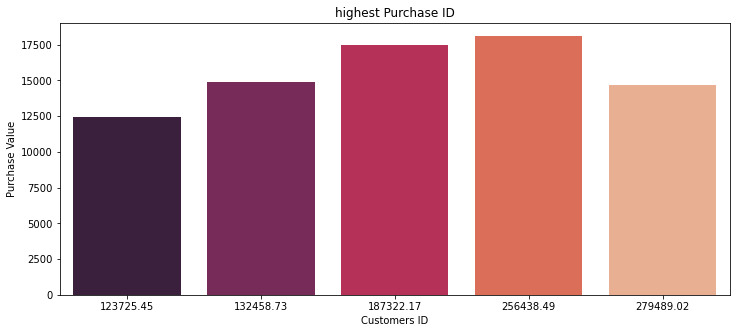

In [20]:
high_purchase['ID'] = high_purchase.index
plt.figure(figsize=(12,5))
sns.barplot(x = 'Quantity_per_unit', y = 'ID',data = high_purchase,palette= "rocket")
plt.xlabel('Customers ID')
plt.ylabel('Purchase Value')
plt.title('highest Purchase ID')
plt.show()

Which is the highest purchasing nation except for the UK?

In [21]:
ct = ecom["Country"].value_counts()
ct[1:].iplot(kind="bar",xTitle='Country', yTitle='Orders',color='#06F106')

Which is the highest purchasing year?

<AxesSubplot:xlabel='Year', ylabel='count'>

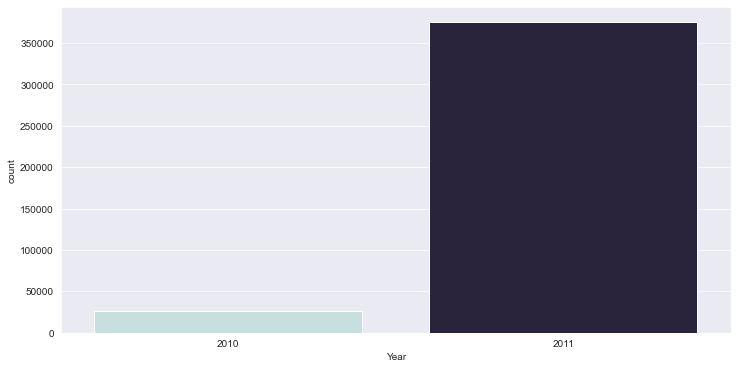

In [22]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid" )
sns.countplot(x='Year',data=ecom,palette='ch:start=.2,rot=-.3')

Which day of the week has the highest purchase for 2011?

In [23]:
for11= ecom[ecom['Year'] == 2011]

In [24]:
for11['Days_of_week'].value_counts(ascending = False).iplot(kind= 'bar',xTitle='Weeks', yTitle='Orders',color = "#00DDFF")

What is the peak time for the highest purchase?

In [25]:
plt.figure(figsize=(5,5))
ecom['Hour'].value_counts().iplot(kind= 'bar',xTitle='Time', yTitle='Orders',color = "Red")
plt.show()

<Figure size 360x360 with 0 Axes>

Which month has the most items sold?

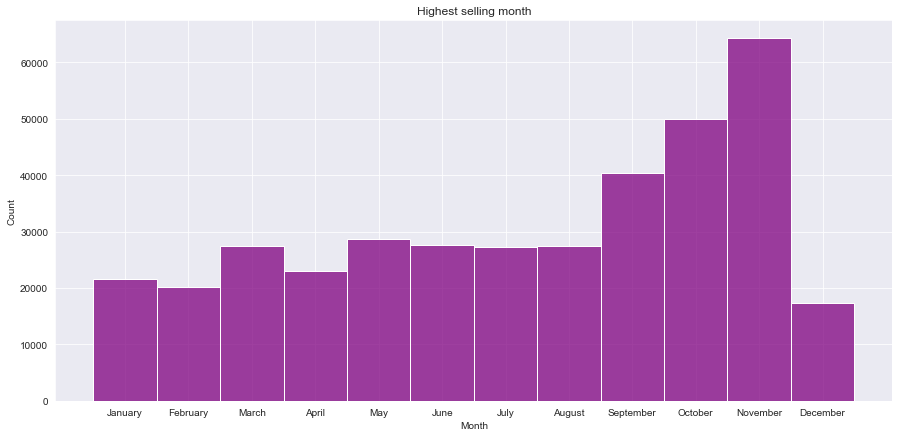

In [26]:
plt.figure(figsize = (15,7))
sns.histplot(for11['Month'],color = "purple")
plt.title('Highest selling month')
plt.show()

Which item has the highest price?

In [27]:
item = ecom.groupby("Description")['Quantity_per_unit'].sum().sort_values(ascending = False).head(10)
item

Description
regency cakestand 3 tier              132567.70
white hanging heart t-light holder     93767.80
jumbo bag red retrospot                83056.52
party bunting                          67628.43
postage                                66710.24
assorted colour bird ornament          56331.91
rabbit night light                     51042.84
chilli lights                          45915.41
paper chain kit 50's christmas         41423.78
picnic basket wicker 60 pieces         39619.50
Name: Quantity_per_unit, dtype: float64

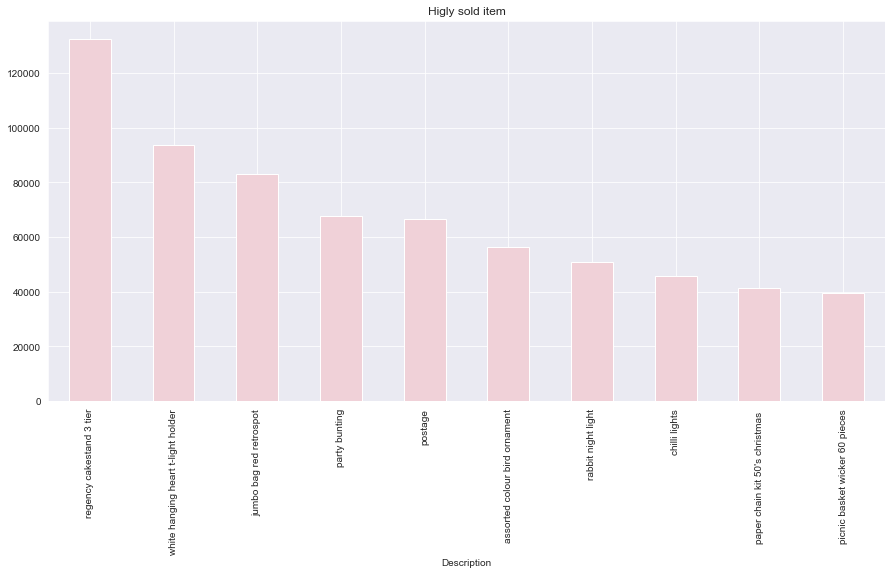

In [28]:
plt.figure(figsize=(15,7))
item.plot(kind='bar',color = '#F0D1D8')
plt.title("Higly sold item")
plt.show()

In [34]:
df = ecom.groupby('Price').mean()
df.corr()


,Quantity,ID,Hour,Year,Quantity_per_unit
Quantity,1.000000,0.121439,-0.073886,-0.021920,0.100978
ID,0.121439,1.000000,-0.091048,-0.082586,0.063450
Hour,-0.073886,-0.091048,1.000000,-0.049713,-0.031942
Year,-0.021920,-0.082586,-0.049713,1.000000,-0.038668
Quantity_per_unit,0.100978,0.063450,-0.031942,-0.038668,1.000000


<AxesSubplot:>

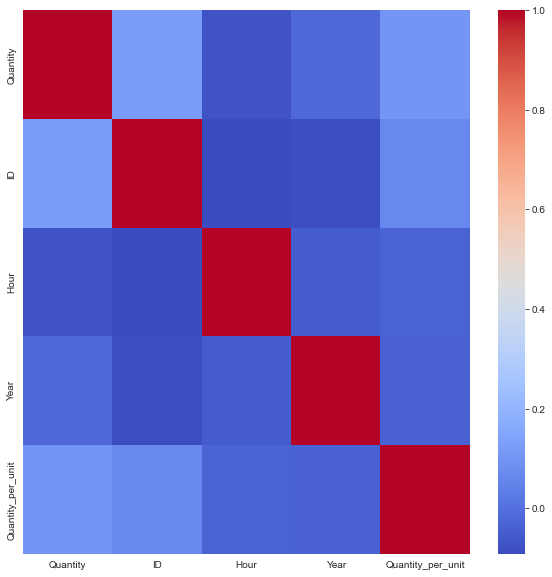

In [39]:
plt.figure(figsize =(10,10))
sns.heatmap(df.corr(),cmap = 'coolwarm')

## Conclusion




***The presented data set's total revenue is 8.2 million, of which there are about 8872 cancelled orders***.

***Id number 256438 represents the data set's top purchasing client***.

***Uk France and Germany are the top two international buyers***.

***According to the statistics, the year 2011 had the greatest purchase data***.

***Thursday is the busiest shopping day of the week, per the data***.

***At noon, consumers tend to make larger purchases***.

***The sales reached a record high in November***.

***Regency cakestand, three tiers, white, with a red retrospot hanging heart t-light.These items were highly expensively priced***.